In [1]:
import pandas as pd
import  matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df_train = pd.read_csv('../.data/train.csv')

## EDA

### 基本情報

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Age, Cabin, Embarked に欠損値あり

### 目的変数

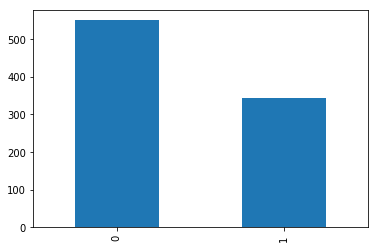

In [6]:
target = 'Survived'
df_train[target].value_counts().plot.bar()

目的変数のバイナリ値に大幅な偏りはないので，不均衡問題をあまり気にする必要はない

揃えたかったら，upsamplingなりdownsamplingなりすれば良い

### 量的変数

In [7]:
cols_qualitative = ['Age', 'SibSp', 'Parch', 'Fare']
df_train[cols_qualitative].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


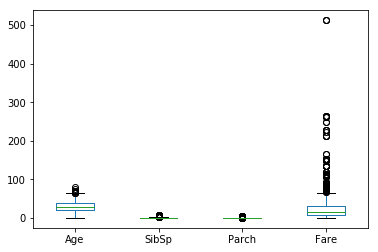

In [8]:
df_train[cols_qualitative].plot.box()

In [9]:
# スタージェスの公式 でとりあえずbin数を決める
n_bins = 1+int(np.log2(df_train.shape[0]))

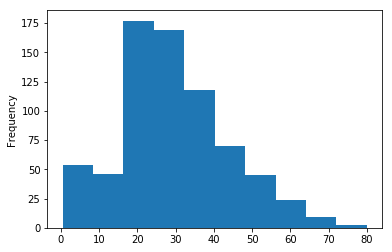

In [10]:
df_train['Age'].plot.hist(bins=n_bins)

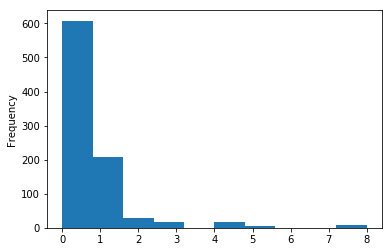

In [11]:
df_train['SibSp'].plot.hist(bins=n_bins)

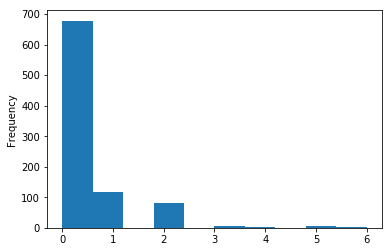

In [12]:
df_train['Parch'].plot.hist(bins=n_bins)

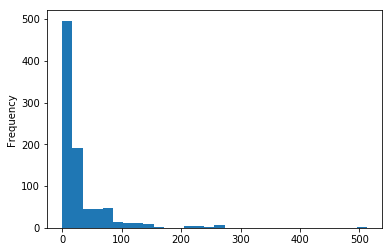

In [13]:
df_train['Fare'].plot.hist(bins=30)

**量的変数まとめ**

- 年齢 Age
    - 20,30題を中心に右に歪んだ（右裾が長い）分布．正規分布からかけ離れているわけではないので，スケールに敏感なモデルでもそこまで気にしなくてよさそう
- タイタニック号に乗っている各客の連れ（家族関係）に関する指標（比）
    - SibSp 兄弟姉妹の数/配偶者の数
        - 裾が重く， 0-1に集中
    - Parch 親の数 / 子供の数
        - 裾が重く， 0-1に集中
- 運賃 Fare
    - 特に裾が重く，0近くに集中
    
今回はロジスティック回帰を用いるので，`SibSp`, `Parch`, `Fare`を説明変数に用いる場合は変換，スケーリングを行ったほうが良さそうに見える

### 質的変数

Nameは非構造データ→今回は扱わない

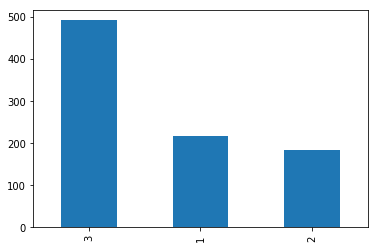

In [14]:
# クラス（階級）を表現する順序尺度
df_train['Pclass'].value_counts().plot.bar()

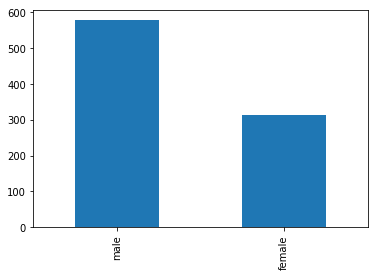

In [15]:
df_train['Sex'].value_counts().plot.bar()

In [16]:
len(df_train['Ticket'].unique())  # チケットは多カテゴリ

681

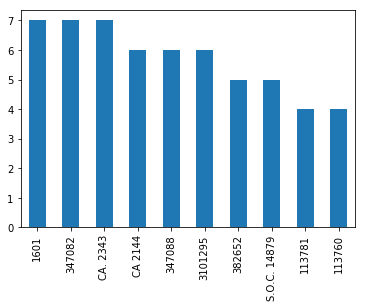

In [17]:
# 上位10カテゴリ
df_train['Ticket'].value_counts()[:10].plot.bar()

チケットのカウント数は本人＋付添の家族数を表す？

→ 実は量的変数として扱う方が都合が良い？

In [18]:
len(df_train['Cabin'].unique())

148

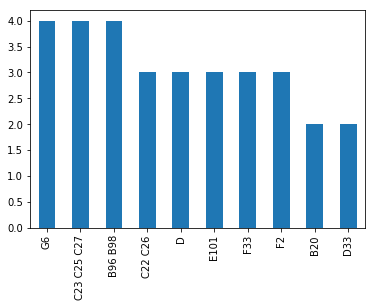

In [19]:
df_train['Cabin'].value_counts()[:10].plot.bar()

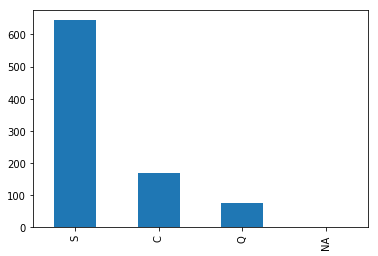

In [20]:
df_train['Embarked'].fillna('NA').value_counts().plot.bar()

In [21]:
# TODO: カテゴリカルデータのencoding